This is a logistic regression model that will predict if it is an cat on the image or not.

Summary:

1 - load_dataset

2 - initialize parameters and standardize dataset

3 - calculate cost function

4 - optimize cost function via gradient descent

5 - predict

6 - run




In [142]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

#sigmoid function for later use
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [143]:
# 1 - first step, loading the dataset

def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

#load variables


In [144]:
#2 - initialize w's and b's with 0
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.0
    return w, b

In [145]:
#2.1 - standardize our dataset
def standardize(train_set_x_orig):
    m_train = train_set_x_orig.shape[0]
    m_test = test_set_x_orig.shape[0]
    num_px = 64
    train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

    train_set_x = train_set_x_flatten / 255.
    test_set_x = test_set_x_flatten / 255.



Now we can use forward propagation to calcute the cost and compute A, after that we can use backwards propagation to minimize the errors .

we forward propagate to get the output and compare it with the real value to get the error.

To minimize the error, you propagate backwards by finding the derivative of error with respect to each weight and then subtracting this value from the weight value.


Forward Propagation:
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

backwards propagation: 

$$ - \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ - \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [146]:
#3 - Cost function and activators vector
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    
    A = sigmoid(np.dot(w.T,X) + b)
    
    
    cost = -1/m * (np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1 - A).T))   
    
    
   
                          
    dw=(1/m)*np.dot(X,(A-Y).T)
    db=(1/m)*np.sum(A-Y)
    
    
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [147]:
#4 - Optimize the parameters w and b with a gradient descent algorithm, the goal is to minimize the cost function
#but for this we need to propagate, to compute the cost function first
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
    
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
       
        grads, cost = propagate(w,b,X,Y) #we use propagate to do this to every w and b
        
        dw = grads["dw"]
        db = grads["db"]
        
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        
        
        if i % 100 == 0:
            costs.append(cost)
        
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


Now we will predict Y.

Calculate $$ 𝑌̂ =𝐴=𝜎(𝑤𝑇𝑋+𝑏) $$


In [148]:
#5 - Predict A(Y)
def predict(w, b, X):
   
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    
    
    for i in range(A.shape[1]):
        
        
        if A[0, i] > 0.5 :
             Y_prediction[0,i] = 1
        else:
             Y_prediction[0,i] = 0
        
    
    return Y_prediction

In [149]:
#6 -  method to call all methods above
def model(X_train, Y_train, X_test, Y_test, num_iterations , learning_rate , print_cost):
    
    # 1 - load dataset
    train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
    
    # We can also standardize our set
    standardize(train_set_x_orig)
   
    
    # 2 - initialize parameters parameters with zero
    w, b = initialize_with_zeros(X_train.shape[0])

    # 3 - Gradient descent 
    parameters, grads, costs =  optimize(w, b, X_train, Y_train, num_iterations, learning_rate , print_cost)
    
    # Retrieve parameters w and b 
    w = parameters["w"]
    b = parameters["b"]
    
    # 4 - Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

   

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [150]:
#7 - Finally, training the model
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.009, print_cost=True)

train accuracy: 99.52153110047847 %
test accuracy: 70.0 %


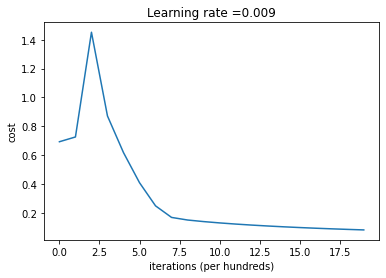

In [151]:
# EXTRA - plotting curves
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

In [152]:
#Predicting images
# change this to the name of your image file
def predicting_image(my_image):
       

    fname = "images/" + my_image
    image = np.array(Image.open(fname).resize((num_px, num_px)))
    plt.imshow(image)
    image = image / 255.
    image = image.reshape((1, num_px * num_px * 3)).T
    my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

    if np.squeeze(my_predicted_image)==1:
        result = "it's an cat!"
    else:
        result = "isn't an cat!"

    print("y = " + result + ", prediction: \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = isn't an cat!, prediction: "non-cat" picture.


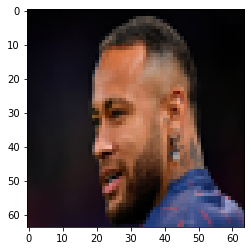

In [153]:
predicting_image("neymar.jpg")

y = it's an cat!, prediction: "cat" picture.


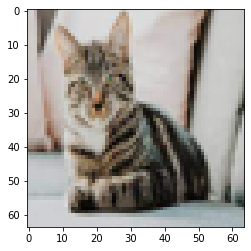

In [154]:
predicting_image("cat.jpg")